In [2]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.graph_objects as go
import datetime
import plotly.express as px
import json
import requests as re
# conda install -c conda-forge psycopg2

In [54]:
import warnings
warnings.filterwarnings('ignore')

### Postgres Database Creditientials with Jupyter Lab

In [3]:
# from sqlalchemy import create_engine
# # Postgres username, password, and database name
# POSTGRES_DBNAME="mid_term_project"
# POSTGRES_ADDRESS = 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com' 
# POSTGRES_PORT = '5432'
# POSTGRES_USERNAME = 'lhl_student' 
# POSTGRES_PASSWORD = 'lhl_student' 
# # A long string that contains the necessary Postgres login information
# postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,
# port=POSTGRES_PORT,dbname=POSTGRES_DBNAME))
# # Create the connection
# cnx = create_engine(postgres_str)

### Sample Query Syntax


In [4]:
# pd.read_sql_query('''SELECT * FROM flights WHERE mkt_carrier_fl_num > 5600 LIMIT 10;''', cnx)
# passenger_df = pd.read_sql_query('''SELECT airline_id,air_time,distance,carrier_name FROM passengers ORDER BY RANDOM() LIMIT 200000''',cnx)

In [5]:
passenger_df #can group by arilines

,airline_id,air_time,distance,carrier_name
0,20436,789.0,771.0,Frontier Airlines Inc.
1,21629,35.0,0.0,Western Global
2,21352,180.0,1303.0,Avjet Corporation
3,19393,2532.0,534.0,Southwest Airlines Co.
4,20336,796.0,49.0,Hageland Aviation Service
...,...,...,...,...
199995,19874,28.0,129.0,Air Transport International
199996,19917,103.0,640.0,United Parcel Service
199997,20226,105.0,69.0,Spernak Airways Inc.
199998,20107,725.0,120.0,Federal Express Corporation


### Flights Database from Postgres

In [66]:
flights200k = pd.read_csv('Data/FLIGHTS_cleaned.csv')

In [67]:
#examining the different sorts of delays that can occur
flights200k[['weather_delay','dep_delay','arr_delay','carrier_delay', 'nas_delay','security_delay','late_aircraft_delay']].describe()

,weather_delay,dep_delay,arr_delay,carrier_delay,nas_delay,security_delay,late_aircraft_delay
count,37551.000000,196498.000000,195976.000000,37551.000000,37551.000000,37551.000000,37551.000000
mean,3.707651,10.416727,5.371510,20.505073,16.245746,0.095177,27.063647
std,32.108836,47.964137,50.037171,64.455562,38.112379,3.207904,52.467446
min,0.000000,-104.000000,-233.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-6.000000,-15.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-2.000000,-6.000000,0.000000,3.000000,0.000000,3.000000
75%,0.000000,6.000000,8.000000,17.000000,20.000000,0.000000,33.000000
max,1287.000000,1628.000000,1631.000000,1628.000000,1476.000000,395.000000,1396.000000


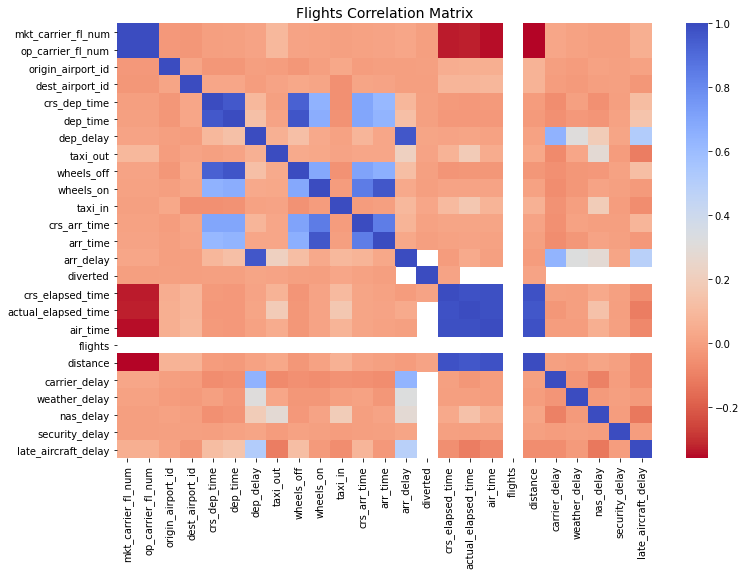

In [65]:
fig, ax = plt.subplots(figsize=(12,8))
sub_sample_corr = flights200k.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title('Flights Correlation Matrix', fontsize=14)
plt.show()

### Passengers Database from Postgres

In [68]:
passengers200k = pd.read_csv('Data/PASSENGER_cleaned.csv')
passengers200k.info()
passengers200k.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             200000 non-null  int64  
 1   departures_scheduled   200000 non-null  float64
 2   departures_performed   200000 non-null  float64
 3   payload                200000 non-null  float64
 4   seats                  200000 non-null  float64
 5   passengers             200000 non-null  float64
 6   freight                200000 non-null  float64
 7   mail                   200000 non-null  float64
 8   distance               200000 non-null  float64
 9   ramp_to_ramp           200000 non-null  float64
 10  air_time               200000 non-null  float64
 11  unique_carrier         200000 non-null  object 
 12  airline_id             200000 non-null  int64  
 13  unique_carrier_name    200000 non-null  object 
 14  region                 200000 non-nu

,Unnamed: 0,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,...,origin_airport_id,origin_city_market_id,dest_airport_id,dest_city_market_id,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group
count,200000.000000,200000.00000,200000.000000,2.000000e+05,200000.000000,200000.00000,2.000000e+05,2.000000e+05,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000
mean,99999.500000,20.28890,22.696410,8.517293e+05,2568.850665,2097.19092,1.032490e+05,2.851546e+03,1043.984495,2893.003985,...,12816.523330,32101.606395,12799.966300,32083.860015,5.514485,606.174760,1.212745,2017.03089,6.549040,2.637115
std,57735.171256,37.88356,35.661841,1.505973e+06,4790.585583,4010.46571,5.254641e+05,2.430157e+04,1256.818547,5258.830624,...,1612.154473,1533.171644,1610.624542,1525.981752,1.538233,166.367127,0.525648,1.41678,3.454909,2.488232
min,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,10005.000000,30005.000000,10005.000000,30005.000000,0.000000,10.000000,1.000000,2015.00000,1.000000,1.000000
25%,49999.750000,0.00000,1.000000,3.887900e+04,50.000000,10.00000,0.000000e+00,0.000000e+00,283.000000,115.000000,...,11298.000000,30852.000000,11298.000000,30852.000000,6.000000,614.000000,1.000000,2016.00000,4.000000,1.000000
50%,99999.500000,4.00000,9.000000,2.530470e+05,496.000000,354.00000,0.000000e+00,0.000000e+00,661.000000,670.000000,...,12892.000000,31703.000000,12892.000000,31703.000000,6.000000,631.000000,1.000000,2017.00000,7.000000,2.000000
75%,149999.250000,28.00000,30.000000,1.066925e+06,3385.000000,2667.00000,3.590000e+03,0.000000e+00,1230.000000,3694.000000,...,14100.000000,33195.000000,14100.000000,33192.000000,6.000000,691.000000,1.000000,2018.00000,10.000000,3.000000
max,199999.000000,2141.00000,993.000000,4.455440e+07,109184.000000,85671.00000,3.562719e+07,3.847215e+06,9886.000000,197248.000000,...,16869.000000,36839.000000,16869.000000,36830.000000,8.000000,889.000000,4.000000,2019.00000,12.000000,20.000000


### Fuel Consumption Database from Postgres

In [69]:
fuel200k = pd.read_csv('Data/FUEL_cleaned.csv')
# fuel200k.info()
# fuel200k.describe()
fuel200k.isnull().sum()

Unnamed: 0           0
month                0
airline_id           0
unique_carrier       0
carrier              0
carrier_name         0
carrier_group_new    0
sdomt_gallons        0
satl_gallons         0
spac_gallons         0
slat_gallons         0
sint_gallons         0
ts_gallons           0
tdomt_gallons        0
tint_gallons         0
total_gallons        0
sdomt_cost           0
satl_cost            0
spac_cost            0
slat_cost            0
sint_cost            0
ts_cost              0
tdomt_cost           0
tint_cost            0
total_cost           0
year                 0
dtype: int64

### Flight Test Database from Postgres (only is use for testing of our ML regression models)

In [47]:
flight_test = pd.read_sql_query('''SELECT * FROM flights_test;''', cnx)
flight_test.to_csv('flighttest.csv')

In [37]:
flight_test = pd.read_csv('fuel.csv')
# flight_test.info()
# flight_test.describe()
flight_test.isnull().sum()

Unnamed: 0           0
month                0
airline_id           1
unique_carrier       1
carrier              0
carrier_name         1
carrier_group_new    0
sdomt_gallons        1
satl_gallons         1
spac_gallons         1
slat_gallons         2
sint_gallons         1
ts_gallons           1
tdomt_gallons        3
tint_gallons         1
total_gallons        6
sdomt_cost           0
satl_cost            1
spac_cost            1
slat_cost            1
sint_cost            1
ts_cost              0
tdomt_cost           0
tint_cost            1
total_cost           0
year                 0
dtype: int64

## Task 1: Test the hypothesis that the delay is from Normal distribution. and that mean of the delay is 0. Be careful about the outliers.

In [46]:
flights200k[['dep_delay','arr_delay']].describe()
arrivals_t = flights200k['arr_delay']
delay_t = flights200k['dep_delay']
flights200k[['arr_delay' ]].gt(0).value_counts() #porportion of flights that arrive early rather than later than anticipated

arr_delay
False        128199
True          68319
dtype: int64

/Users/arjunduggal/anaconda/envs/test_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/arjunduggal/anaconda/envs/test_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

No handles with labels found to put in legend.


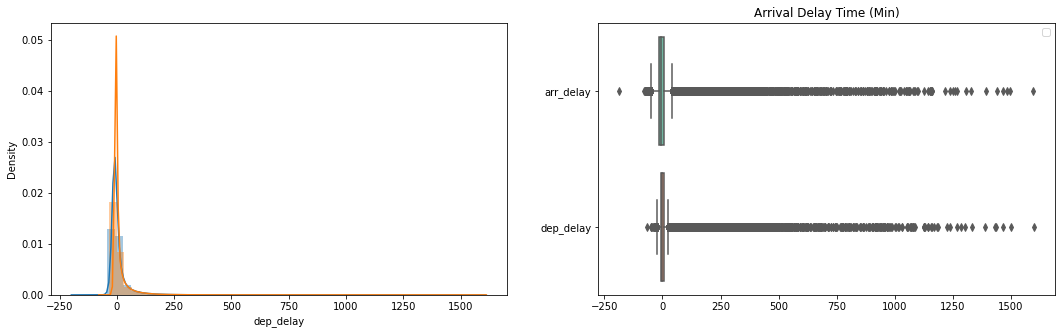

In [51]:
#checking there distribution

fig, ax = plt.subplots(1,2, figsize=(18,5));
sns.distplot(arrivals_t, kde=True, rug=False,label='arr_delay', ax =ax[0])
sns.distplot(delay_t, kde=True, rug=False, label='dep_delay', ax =ax[0])
plt.legend() #how else can we verify the normality of these features

ax[1] = sns.boxplot(data=flights200k[['arr_delay','dep_delay']], orient="h", palette="Set2")
ax[1].set_title('Arrival Delay Time (Min)');
plt.show();

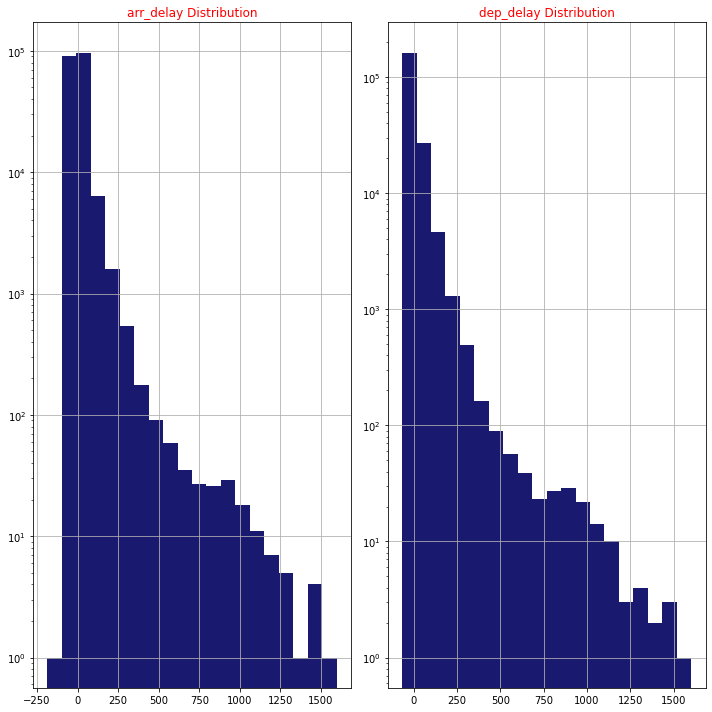

In [33]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(10,10))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='Red')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(flights200k,flights200k[['arr_delay','dep_delay' ]],1,2)

In [34]:
at1 = arrivals_t[arrivals_t.between(arrivals_t.quantile(.05), arrivals_t.quantile(.95))]
dt1 = delay_t[delay_t.between(delay_t.quantile(.05), delay_t.quantile(.95))]

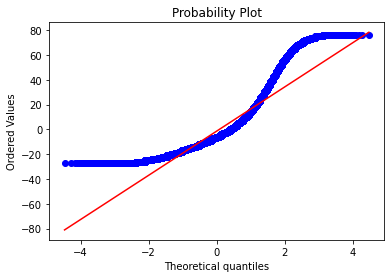

In [35]:
stats.probplot(at1, dist="norm", plot=plt)
plt.show()

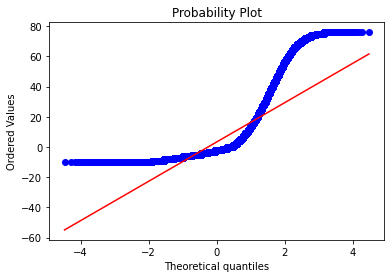

In [36]:
stats.probplot(dt1, dist="norm", plot=plt)
plt.show() #also some test statistics we can use to demonstrate any normality that may exist, most of them come from scipy stats package

In [52]:
#With such a siginificant std, we may want to define some function to get rid of outliers
flights200k['arr_delay'].describe()

count    195967.000000
mean          5.373180
std          49.554793
min        -186.000000
25%         -15.000000
50%          -6.000000
75%           8.000000
max        1596.000000
Name: arr_delay, dtype: float64

## Task 2: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?¶

In [9]:
flights200k['month'] = pd.DatetimeIndex(flights200k['fl_date']).month
flights200k['year'] = pd.DatetimeIndex(flights200k['fl_date']).year
flights200k['day'] = pd.DatetimeIndex(flights200k['fl_date']).day

In [10]:
flights200k['year'].value_counts()

2019    101692
2018     98308
Name: year, dtype: int64

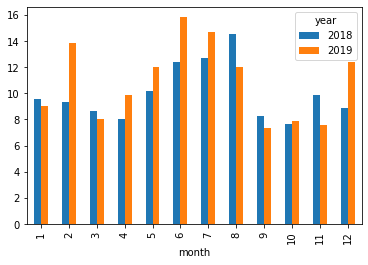

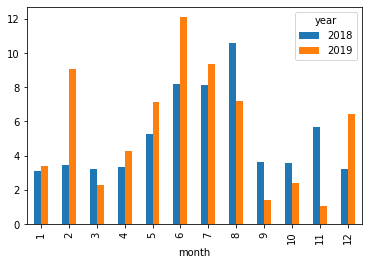

In [11]:
flights200k.groupby(['month','year'])['dep_delay'].mean().unstack('year').plot.bar()
flights200k.groupby(['year','month'])['arr_delay'].mean().unstack('year').plot.bar()
# plot.set_xticks(['Jan', 'Feb', 'Mar', 'Apr','May','Jun',"Juy",'Aug','Sept','Oct','Nov','Dec'])

In [12]:
g1 = flights200k.groupby(['month','year'])['dep_delay'].mean()
g2 = flights200k.groupby(['month','year'])['arr_delay'].mean() #respective series containing yearly and monthly average delay times
dft = pd.concat([g1,g2],axis=1).reset_index()

In [13]:
dft

,month,year,dep_delay,arr_delay
0,1,2018,9.536821,3.092561
1,1,2019,9.052389,3.409254
2,2,2018,9.319977,3.481087
3,2,2019,13.828713,9.067859
4,3,2018,8.644202,3.241090
5,3,2019,8.070288,2.281650
6,4,2018,8.031963,3.338781
7,4,2019,9.878124,4.284991
8,5,2018,10.200336,5.293529
9,5,2019,12.034329,7.140123


In [65]:
# fig = px.bar(df3, x="month", y="arr_delay",color="year", barmode = 'group')
# fig.show()

In [64]:
# dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 
#                                            6:'Saturday', 7:'Sunday'}
# dff = df.day.value_counts()
# dff = dff.to_frame().sort_index()
# dff.index = dff.index.map(dayOfWeek)

# trace1 = go.Bar(
#     x=dff.index,
#     y=dff.day,
#     name = 'Weather',
#     marker=dict(
#         color = dff.day,
#         colorscale='Jet',
#         showscale=True
#     )
# )

# data = [trace1]
# layout = go.Layout(
#     title='# of Flights (Day of Week)', 
#     yaxis = dict(title = '# of Flights'
#                                                     )
# )

# fig = go.Figure(data=data, layout=layout)
# fig.show()